In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\acer\Downloads\movies.csv')

In [2]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:

# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

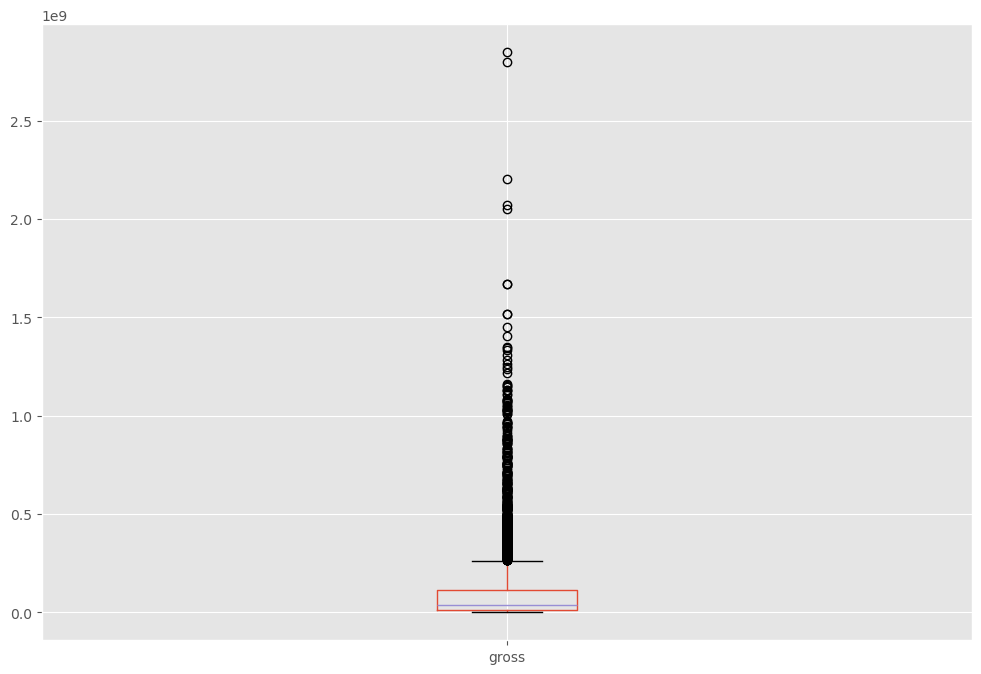

In [26]:

# Are there any Outliers?

df.boxplot(column=['gross'])

In [5]:
df = df[pd.to_numeric(df['budget'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['gross'], errors='coerce').notnull()]

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0)

print(df['budget'].isnull().sum())
print(df['gross'].isnull().sum())

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


0
0


In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [9]:
# Extract the year using a regular expression
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

# If you want to convert the year to an integer type
df['yearcorrect'] = df['yearcorrect'].astype(int)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [10]:
# Order our Data a little bit to see

df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [11]:
pd.set_option('display.max_rows', None)

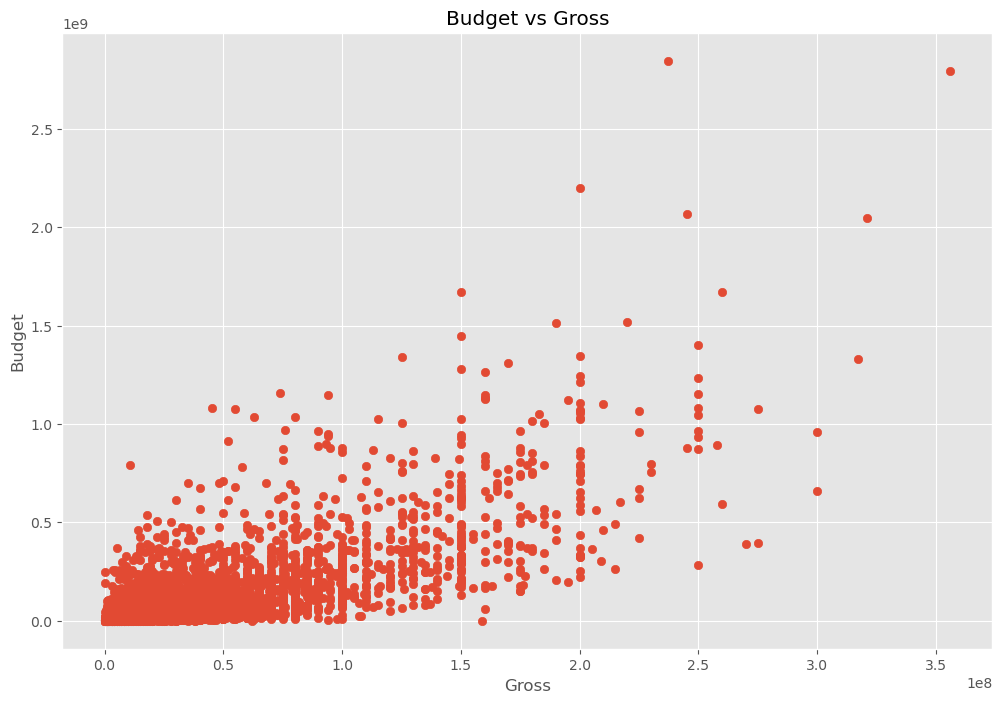

In [12]:
# scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title("Budget vs Gross")

plt.xlabel("Gross")

plt.ylabel("Budget")

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

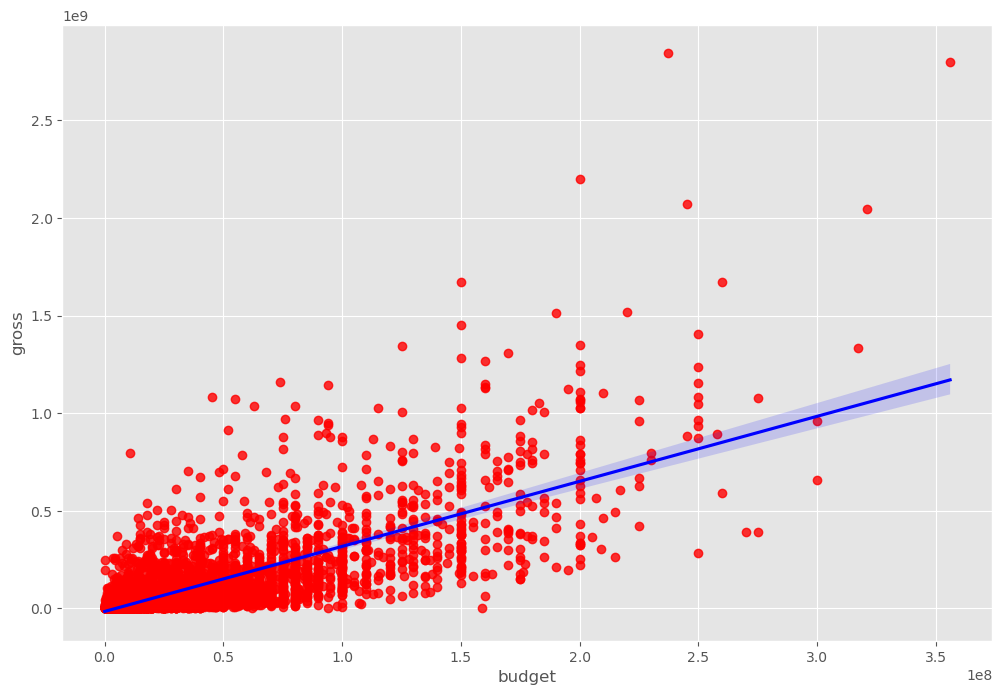

In [13]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

<Axes: xlabel='score', ylabel='gross'>

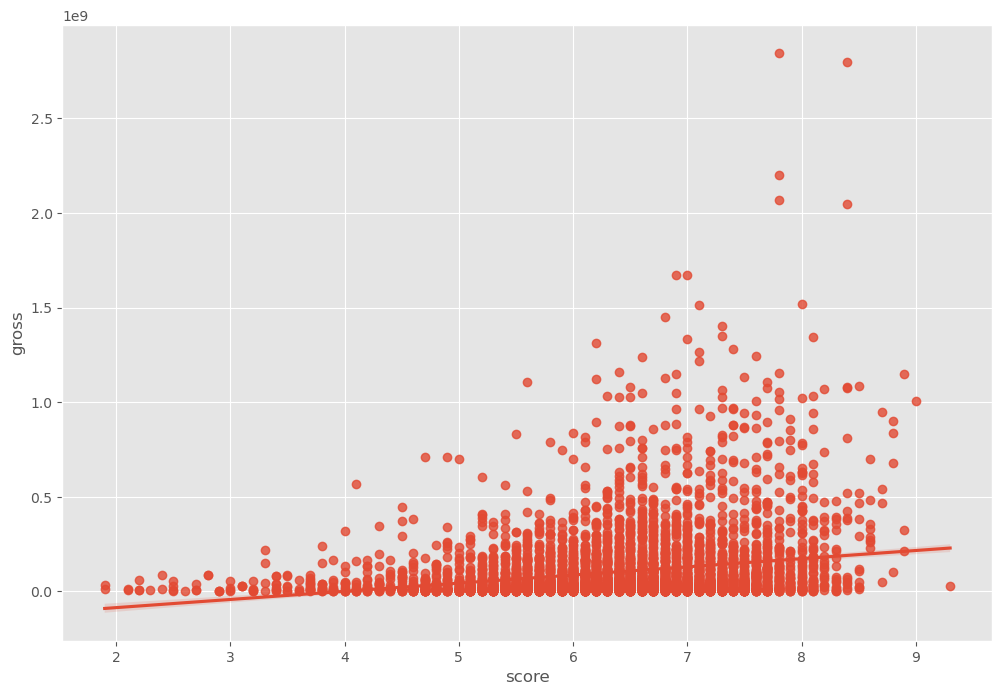

In [27]:
sns.regplot(x="score", y="gross", data=df)

In [14]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 year     score     votes    budget     gross   runtime  \
year         1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score        0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes        0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget       0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross        0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime      0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
yearcorrect  0.998641  0.061029  0.202883  0.320245  0.268626  0.074432   

             yearcorrect  
year            0.998641  
score           0.061029  
votes           0.202883  
budget          0.320245  
gross           0.268626  
runtime         0.074432  
yearcorrect     1.000000  


In [15]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method ='pearson')
#correlation_matrix = numeric_df.corr(method ='kendall')
print(correlation_matrix)

                 year     score     votes    budget     gross   runtime  \
year         1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score        0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes        0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget       0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross        0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime      0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
yearcorrect  0.998641  0.061029  0.202883  0.320245  0.268626  0.074432   

             yearcorrect  
year            0.998641  
score           0.061029  
votes           0.202883  
budget          0.320245  
gross           0.268626  
runtime         0.074432  
yearcorrect     1.000000  


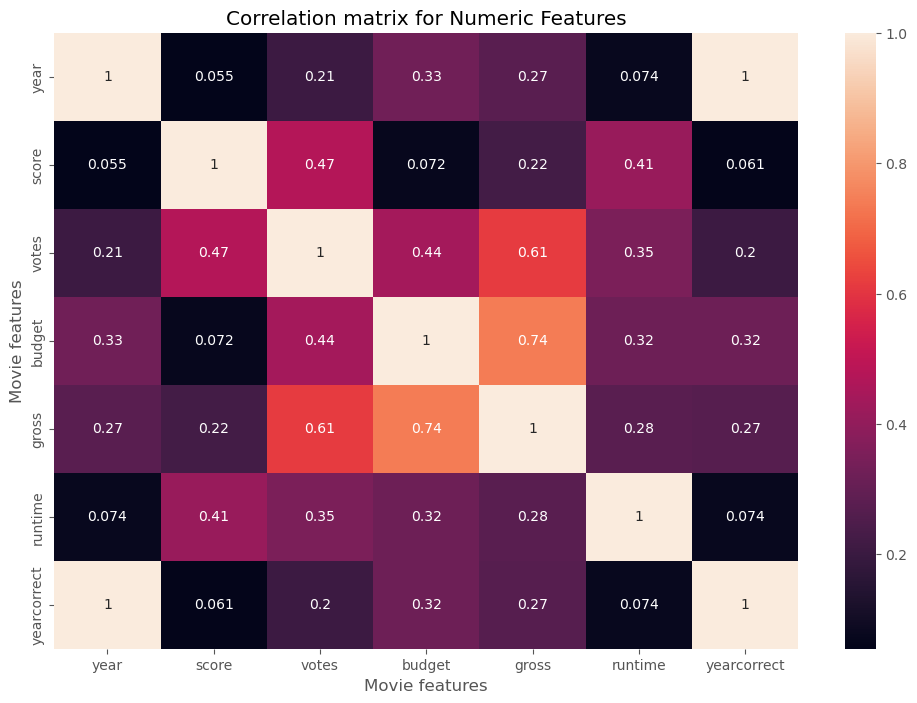

In [16]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [19]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,387,5,0,2009,528,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,2009
7445,389,5,0,2019,138,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,2019
3045,4923,5,6,1997,535,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,1997
6663,3656,5,0,2015,530,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,2015
7244,390,5,0,2018,146,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,2018


In [23]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.023013
      genre       0.009617
      year        0.024435
      released   -0.005896
dtype: float64

In [24]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.368900
genre   budget   -0.368900
        gross    -0.244380
gross   genre    -0.244380
rating  budget   -0.186892
dtype: float64

In [25]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr.head()

gross   votes          0.614904
votes   gross          0.614904
gross   budget         0.740395
budget  gross          0.740395
year    yearcorrect    0.998641
dtype: float64

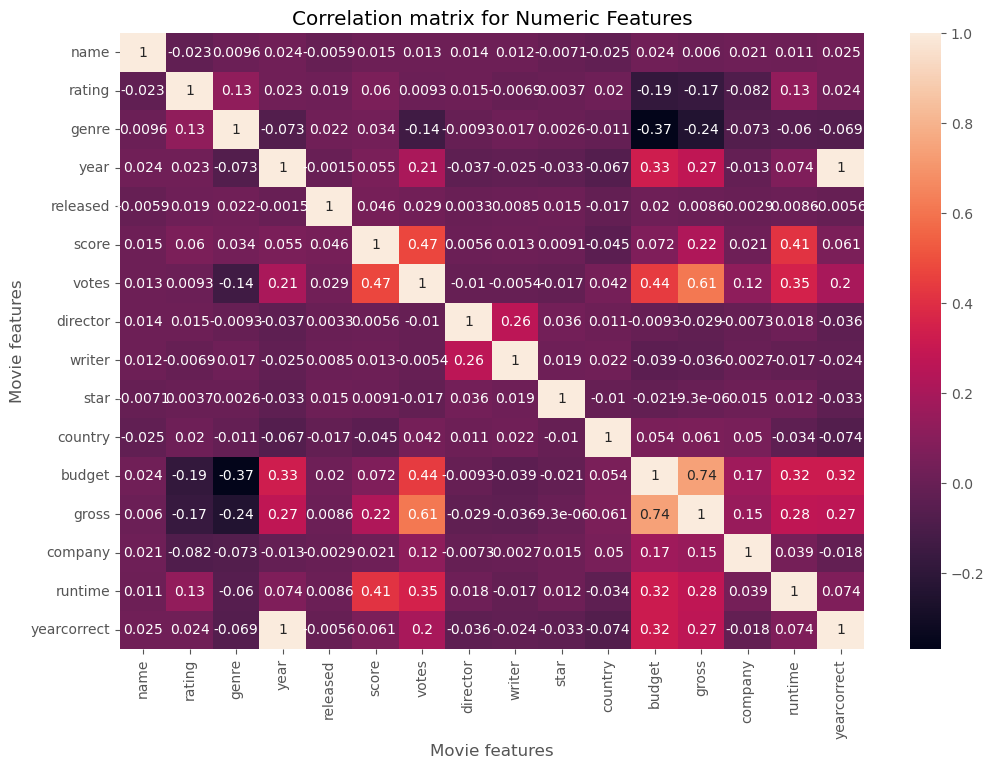

In [28]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [29]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company
1432    54773202654
1403    51241105418
454     42356430218
1114    40021704691
1388    39542573303
1429    35833650748
1048    19628786232
987     15065592411
552     11873612858
553     11593807697
1373    10664679494
1005     8937010092
1315     8318570396
1140     7886344526
684      7243673721
Name: gross, dtype: int64

In [31]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company year            
-1      1984     2687148
        1989     1097333
 0      2003    44350926
 1      2019   193457467
 2      1996       10580
 3      1996   129832389
        1999    87423861
 4      1983    12232628
 5      2003     4928883
 6      2017    40656399
 7      2014    58834384
 8      2002      264349
 9      2019   122810399
 10     2007    22783978
 11     2004    69424389
 12     2020   111105497
 13     2014    41296320
        2018    41142379
 14     1990     5835247
 15     1994     1702394
 16     2002    23932055
 17     2009    20458873
 18     2007     7248490
        2008    28705178
        2014     5092129
 19     2016      678150
        2018   197744377
 20     1996    60209334
        1997    75812433
        2001    71186502
        2010      649626
        2013     3909596
        2014   161459297
        2015    36606743
        2019    22386555
 21     1999     8408835
 22     2017     5042014
 23     2007     9669758
 24     2001     4760014
 25     1999   133949270
 26     1986     7137502
        1989    37295445
        1995    15403436
        1999    34573780
        2000    27728118
        2004     1526951
 27     2007    95802916
 28     1999      206128
 29     2000     3033646
 30     1990    10005969
 31     1990   201965915
 32     2003     5141166
 33     2002    80693537
 34     1995     3734870
        1996       49620
        2002    14946150
 35     1984     1455045
        1988      161004
        1992     1526697
        1993     1677807
 36     2014    36869414
        2016    72551409
        2018    23650455
        2019    47967636
 37     1983    35615609
        1984     2773433
        1986     9697739
 38     1990      349618
 39     2016    39712000
        2017    53939297
 40     2005    12693645
 41     1989       67878
 42     1984    52066791
        1998     1263279
 43     2013    17496820
 44     2014    25419147
 45     1980    21448782
        1981    25244626
 46     2012     5277766
 47     2000   224834564
        2005   194137091
        2006   178281554
 48     1989     3169719
 49     1987     3685862
 50     2008    87066930
 51     2013     1456675
 52     2012   116471580
 53     1988     4192440
 54     2017    43980821
 55     2018   117679066
 56     1987    30902642
        1989     1877618
 57     2012     1386088
 58     2011     3242802
 59     1983    17488564
 60     1996      749741
        1997    12782749
 61     1992     5378172
 62     2019    38026103
 63     2013    11806432
 64     1997      127923
 65     2013   181769347
 66     1994      763847
 67     1999     6552255
        2000    35547761
        2001     1198113
        2002   113758770
        2004    12313323
        2005   132768353
        2006    65664721
        2007   156835339
        2008    90200168
        2009   309208309
        2010   157107755
        2011   161043822
        2012    38390020
        2013   182178825
        2014   106435603
        2015   161690734
        2017   284935792
        2018    67450815
 68     1992     9569275
        1993    46768542
        1995    23440188
 69     2014    87835664
 70     2012     7029095
 71     2018    38755900
 72     1987    14182492
        1988    13008928
        1989    16554699
        1991     1193062
 73     1988    57041866
        1991    23202444
        2002    73839240
 74     1997    14772788
 75     2005    29612137
 76     1989     4973285
 77     2012     1544989
 78     1997     2804473
        2001    12881605
        2002     6413915
        2003     1271244
 79     1996     2671291
 80     2013    27858103
 81     1992    58124215
        1993    20915465
 82     1995    10382407
 83     1989     1919653
        1992    32100816
 84     2015   542358331
 85     2017    61621140
        2019     6750029
 86     2015     2333684
 87     1982     2032311
 88     1984       95000
 89     2002    12150301
 90     2012    15950164
 91     2000    20908467
 92     2001     18

In [32]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company  year
1429     2019    5773131804
987      2018    4018631866
1403     2015    3834354888
1388     2009    3793491246
1429     2017    3789382071
1114     2011    3565705182
1432     2011    3223799224
1429     2010    3104474158
1114     2014    3071298586
454      2006    2934631933
         2019    2932757449
987      2019    2797501328
1432     2018    2774168962
454      2011    2738363306
1432     2005    2688767210
Name: gross, dtype: int64

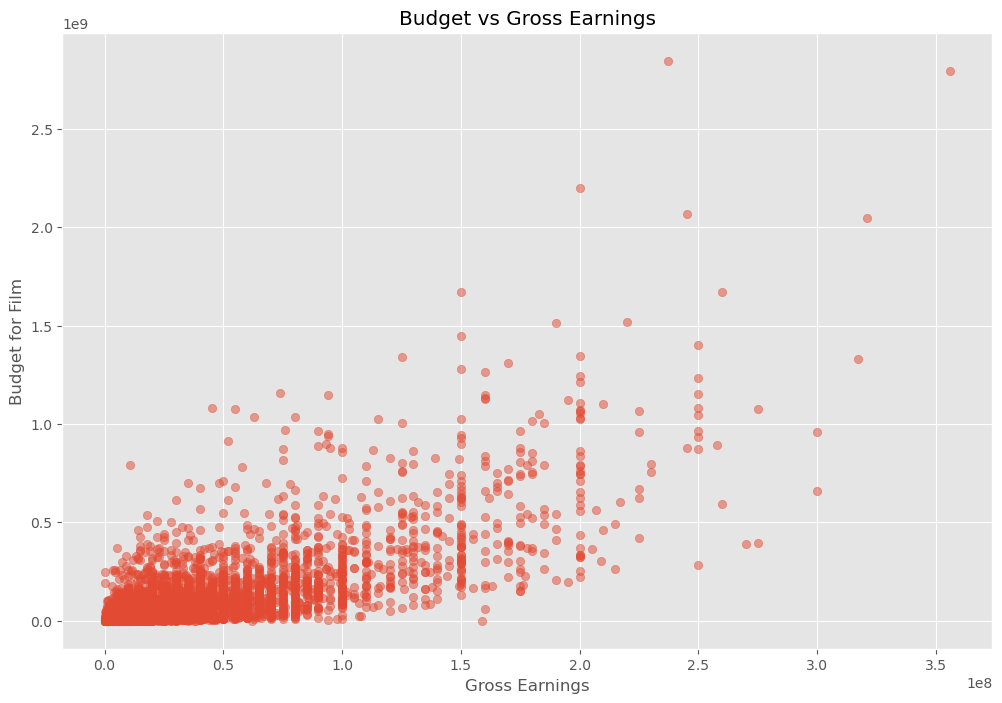

In [33]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()